In [32]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [33]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)

In [34]:
u @ u.T.conjugate() # u is unitary. Its columns are left singular vectors

array([[ 1.+0.j,  0.+0.j, -0.+0.j, -0.-0.j],
       [ 0.-0.j,  1.+0.j, -0.+0.j, -0.-0.j],
       [-0.-0.j, -0.-0.j,  1.+0.j, -0.-0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j,  1.+0.j]])

In [35]:
vh @ vh.T.conjugate() # Rows of vh are right singular vectors

array([[ 1.+0.j, -0.+0.j,  0.-0.j, -0.-0.j,  0.-0.j],
       [-0.-0.j,  1.+0.j, -0.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j,  1.+0.j, -0.-0.j, -0.-0.j],
       [-0.+0.j,  0.-0.j, -0.+0.j,  1.+0.j,  0.-0.j],
       [ 0.+0.j,  0.-0.j, -0.+0.j,  0.+0.j,  1.+0.j]])

In [36]:
s # Only the diagonal entries of Sigma are returned in s

array([3.559, 1.274, 0.552, 0.385])

In [37]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)

In [38]:
u[0, :, np.newaxis] @ vh[np.newaxis, 0, :]

array([[ 0.178,  0.124,  0.124,  0.228,  0.172],
       [ 0.343,  0.238,  0.237,  0.438,  0.33 ],
       [-0.22 , -0.153, -0.153, -0.281, -0.212],
       [ 0.153,  0.106,  0.106,  0.196,  0.147]])

In [39]:
np.outer(u[0, :], vh[0, :])

array([[ 0.178,  0.124,  0.124,  0.228,  0.172],
       [ 0.343,  0.238,  0.237,  0.438,  0.33 ],
       [-0.22 , -0.153, -0.153, -0.281, -0.212],
       [ 0.153,  0.106,  0.106,  0.196,  0.147]])

In [40]:
ar = np.zeros_like(a)
for i in range(4):
  ar += np.outer(u[:, i], s[i] * vh[i, :])

In [41]:
a - ar # a and ar are identical

array([[-0., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0., -0.],
       [ 0., -0., -0., -0., -0.],
       [ 0.,  0., -0., -0., -0.]])

In [42]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

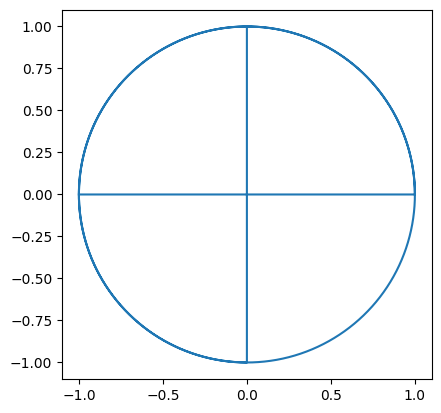

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
def show(c):
  plt.plot(c[0, :], c[1, :])
  plt.axis('image');
# plot the unit circle and axis segments:

t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]),
np.concatenate([z, np.sin(t), l])])

show(c)

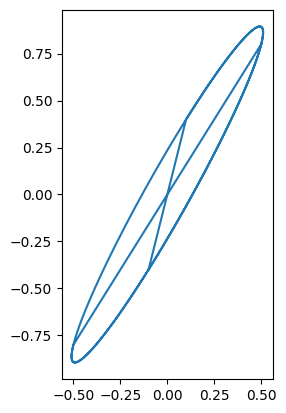

In [44]:
show(a @ c)

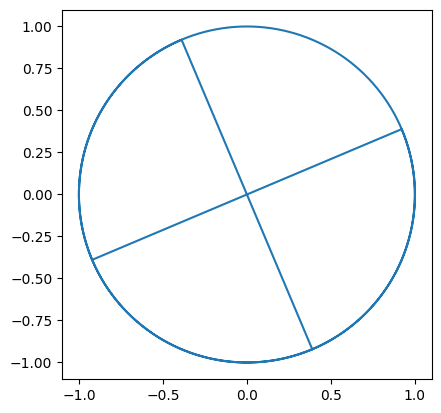

In [45]:
show(vh @ c)

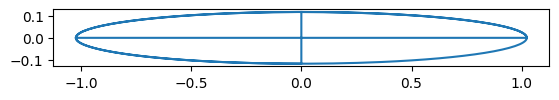

In [46]:
show(np.diag(s) @ c)

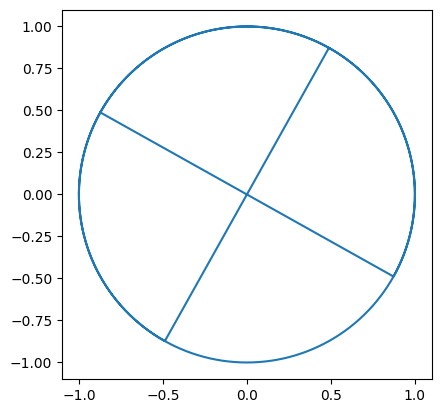

In [47]:
show(u @ c)

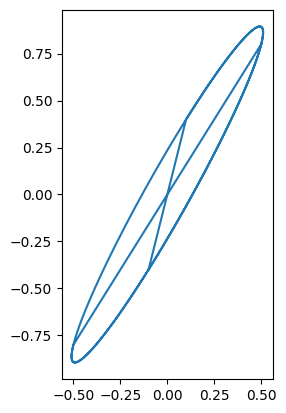

In [48]:
show(u @ np.diag(s) @ vh @ c)

In [49]:
import matplotlib.pyplot as plt

In [50]:
cats = plt.imread('/content/cat-9161.png')
cats.shape

(758, 1040, 4)

In [51]:
np.linalg.norm(cats[..., 0] - cats[..., 2], 'fro')

47.118633

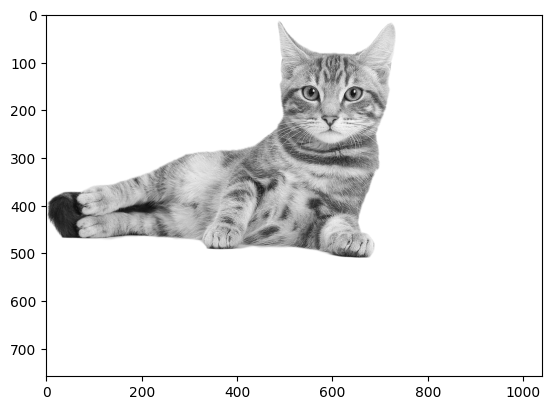

In [52]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');

In [53]:
u, s, vh = svd(c)

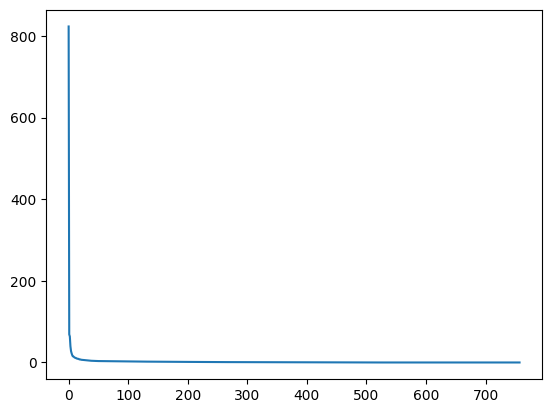

In [54]:
plt.plot(s);

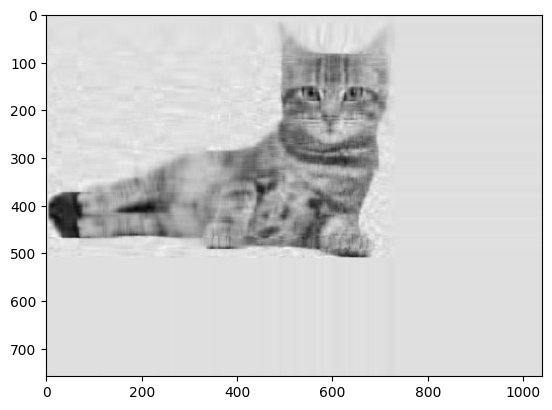

In [55]:
# Rank 20 approximation of the cats:
l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

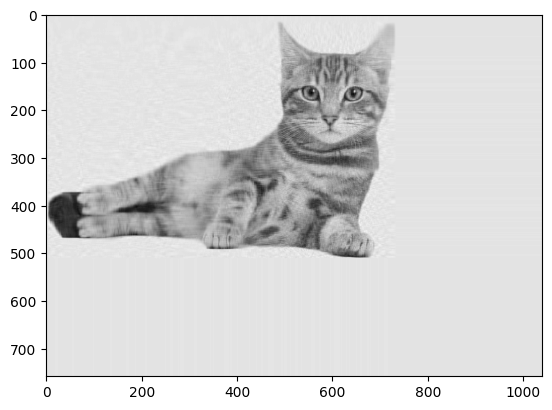

In [56]:
# Rank 50 approximation of the cats:
l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [57]:
relative_error = 1.e-1

In [58]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total - np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

3

In [59]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [60]:
np.linalg.norm(c - cl, 'fro') / np.linalg.norm(c, 'fro')

0.09608819

In [61]:
u.shape[0] * l + l + l * vh.shape[0]

5397

In [62]:
c.shape[0] * c.shape[1]

788320